In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DataFinal.csv')

<AxesSubplot: ylabel='count'>

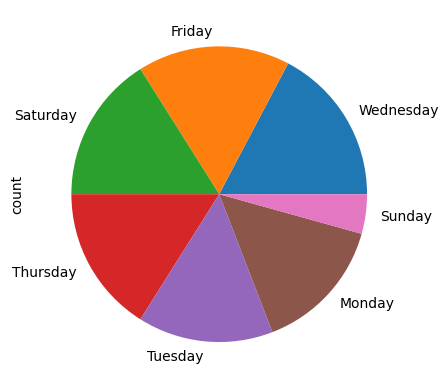

In [3]:
df['Day_name'].value_counts().plot(kind = 'pie')

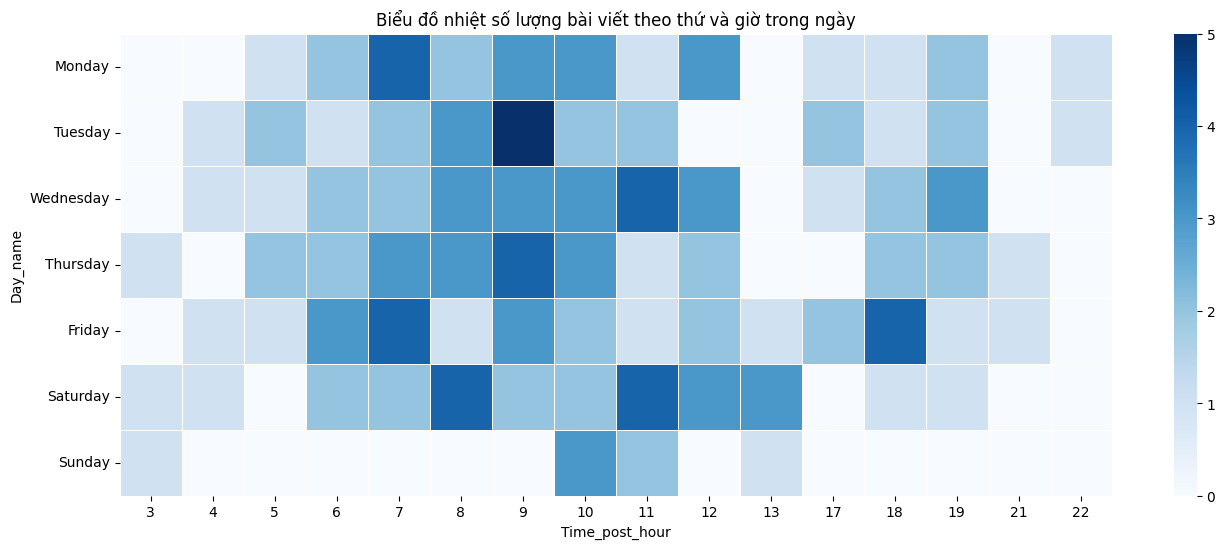

In [63]:
pivot_df = df.pivot_table(index = 'Day_name', columns = 'Time_post_hour', aggfunc = 'size', fill_value = 0)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_df = pivot_df.reindex(day_order)
plt.figure(figsize=(16, 6))
color_palette = sns.color_palette("Blues", as_cmap=True)
sns.heatmap(pivot_df, cmap=color_palette, annot=False, fmt='d', linewidths=.5)
plt.title('Biểu đồ nhiệt số lượng bài viết theo thứ và giờ trong ngày')
plt.show()

In [6]:
df_game = pd.read_csv('NBAGameResult.csv')

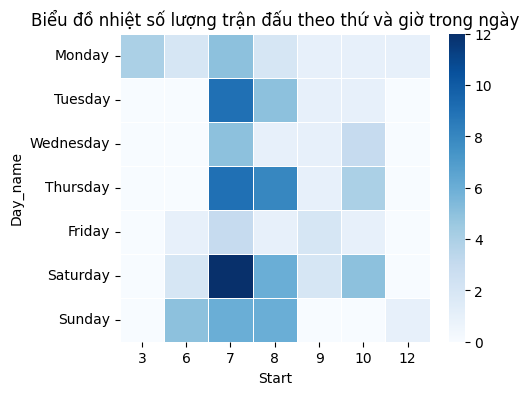

In [7]:
pivot_df_game = df_game.pivot_table(index = 'Day_name', columns = 'Start', aggfunc = 'size', fill_value = 0)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_df_game = pivot_df_game.reindex(day_order)
plt.figure(figsize=(5, 4))
color_palette = sns.color_palette("Blues", as_cmap=True)
sns.heatmap(pivot_df_game, cmap=color_palette, annot=False, fmt='d', linewidths=.5)
plt.title('Biểu đồ nhiệt số lượng trận đấu theo thứ và giờ trong ngày')
plt.show()

In [120]:
df['reaction_count'].describe()

count       162.000000
mean      20896.086420
std       25207.374662
min         205.000000
25%        4107.500000
50%       13632.500000
75%       28599.500000
max      164274.000000
Name: reaction_count, dtype: float64

In [89]:
df['reaction_count'].median()

13632.5

In [4]:
post_original = df.loc[df['shared_text'] == '0']
post_original['reaction_count'].describe()

count       129.000000
mean      26019.217054
std       25870.131764
min         635.000000
25%        9367.000000
50%       16806.000000
75%       32983.000000
max      164274.000000
Name: reaction_count, dtype: float64

In [5]:
post_share = df.loc[df['shared_text'] != '0']
post_share['reaction_count'].describe()
#post share thi it tuong tac hon bth

count      33.000000
mean      869.303030
std       669.930523
min       205.000000
25%       433.000000
50%       646.000000
75%       944.000000
max      2660.000000
Name: reaction_count, dtype: float64

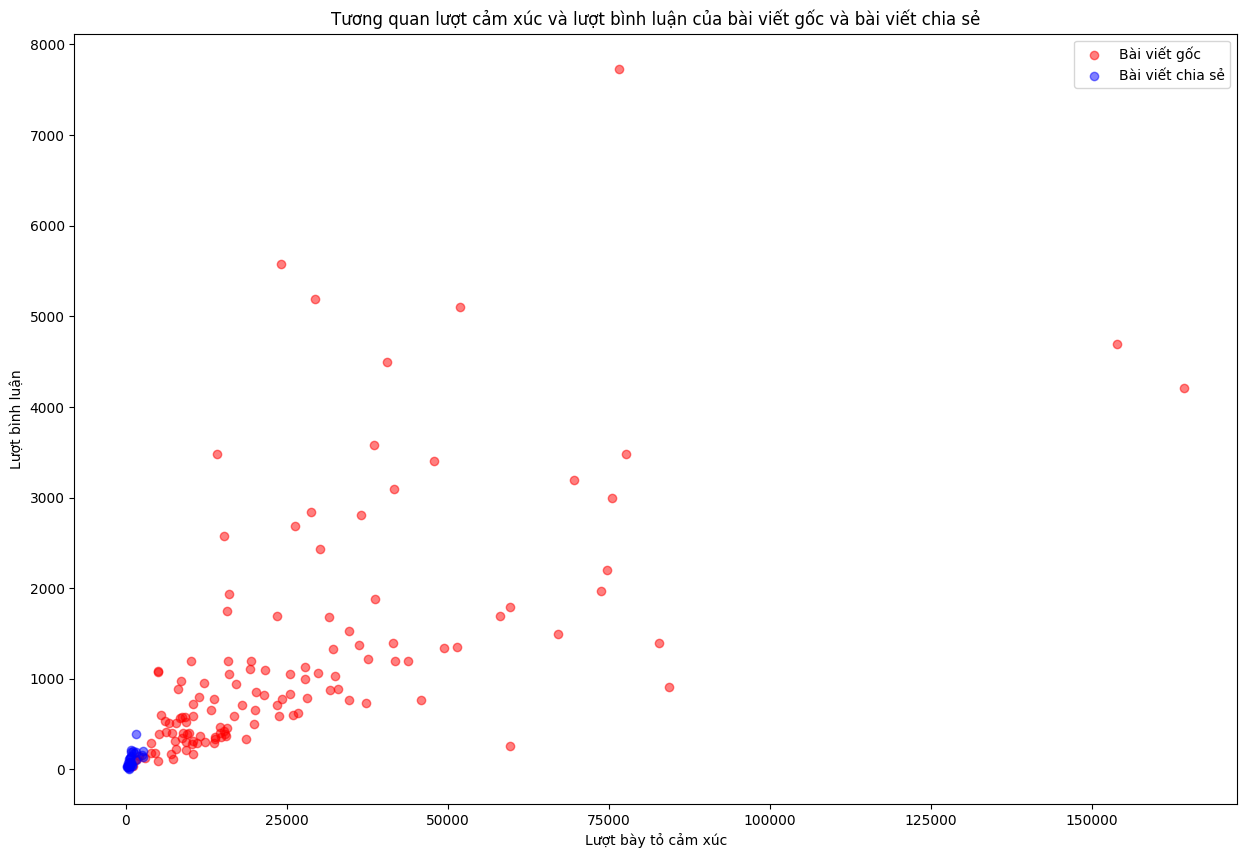

In [7]:
plt.figure(figsize = (15,10))
plt.scatter(post_original['reaction_count'], post_original['comments'], color = 'red', label = 'Bài viết gốc', alpha = 0.5)
plt.scatter(post_share['reaction_count'], post_share['comments'], color = 'blue', label = 'Bài viết chia sẻ', alpha = 0.5)
plt.xlabel('Lượt bày tỏ cảm xúc')
plt.ylabel('Lượt bình luận')
plt.title('Tương quan lượt cảm xúc và lượt bình luận của bài viết gốc và bài viết chia sẻ')
plt.legend()
plt.show()

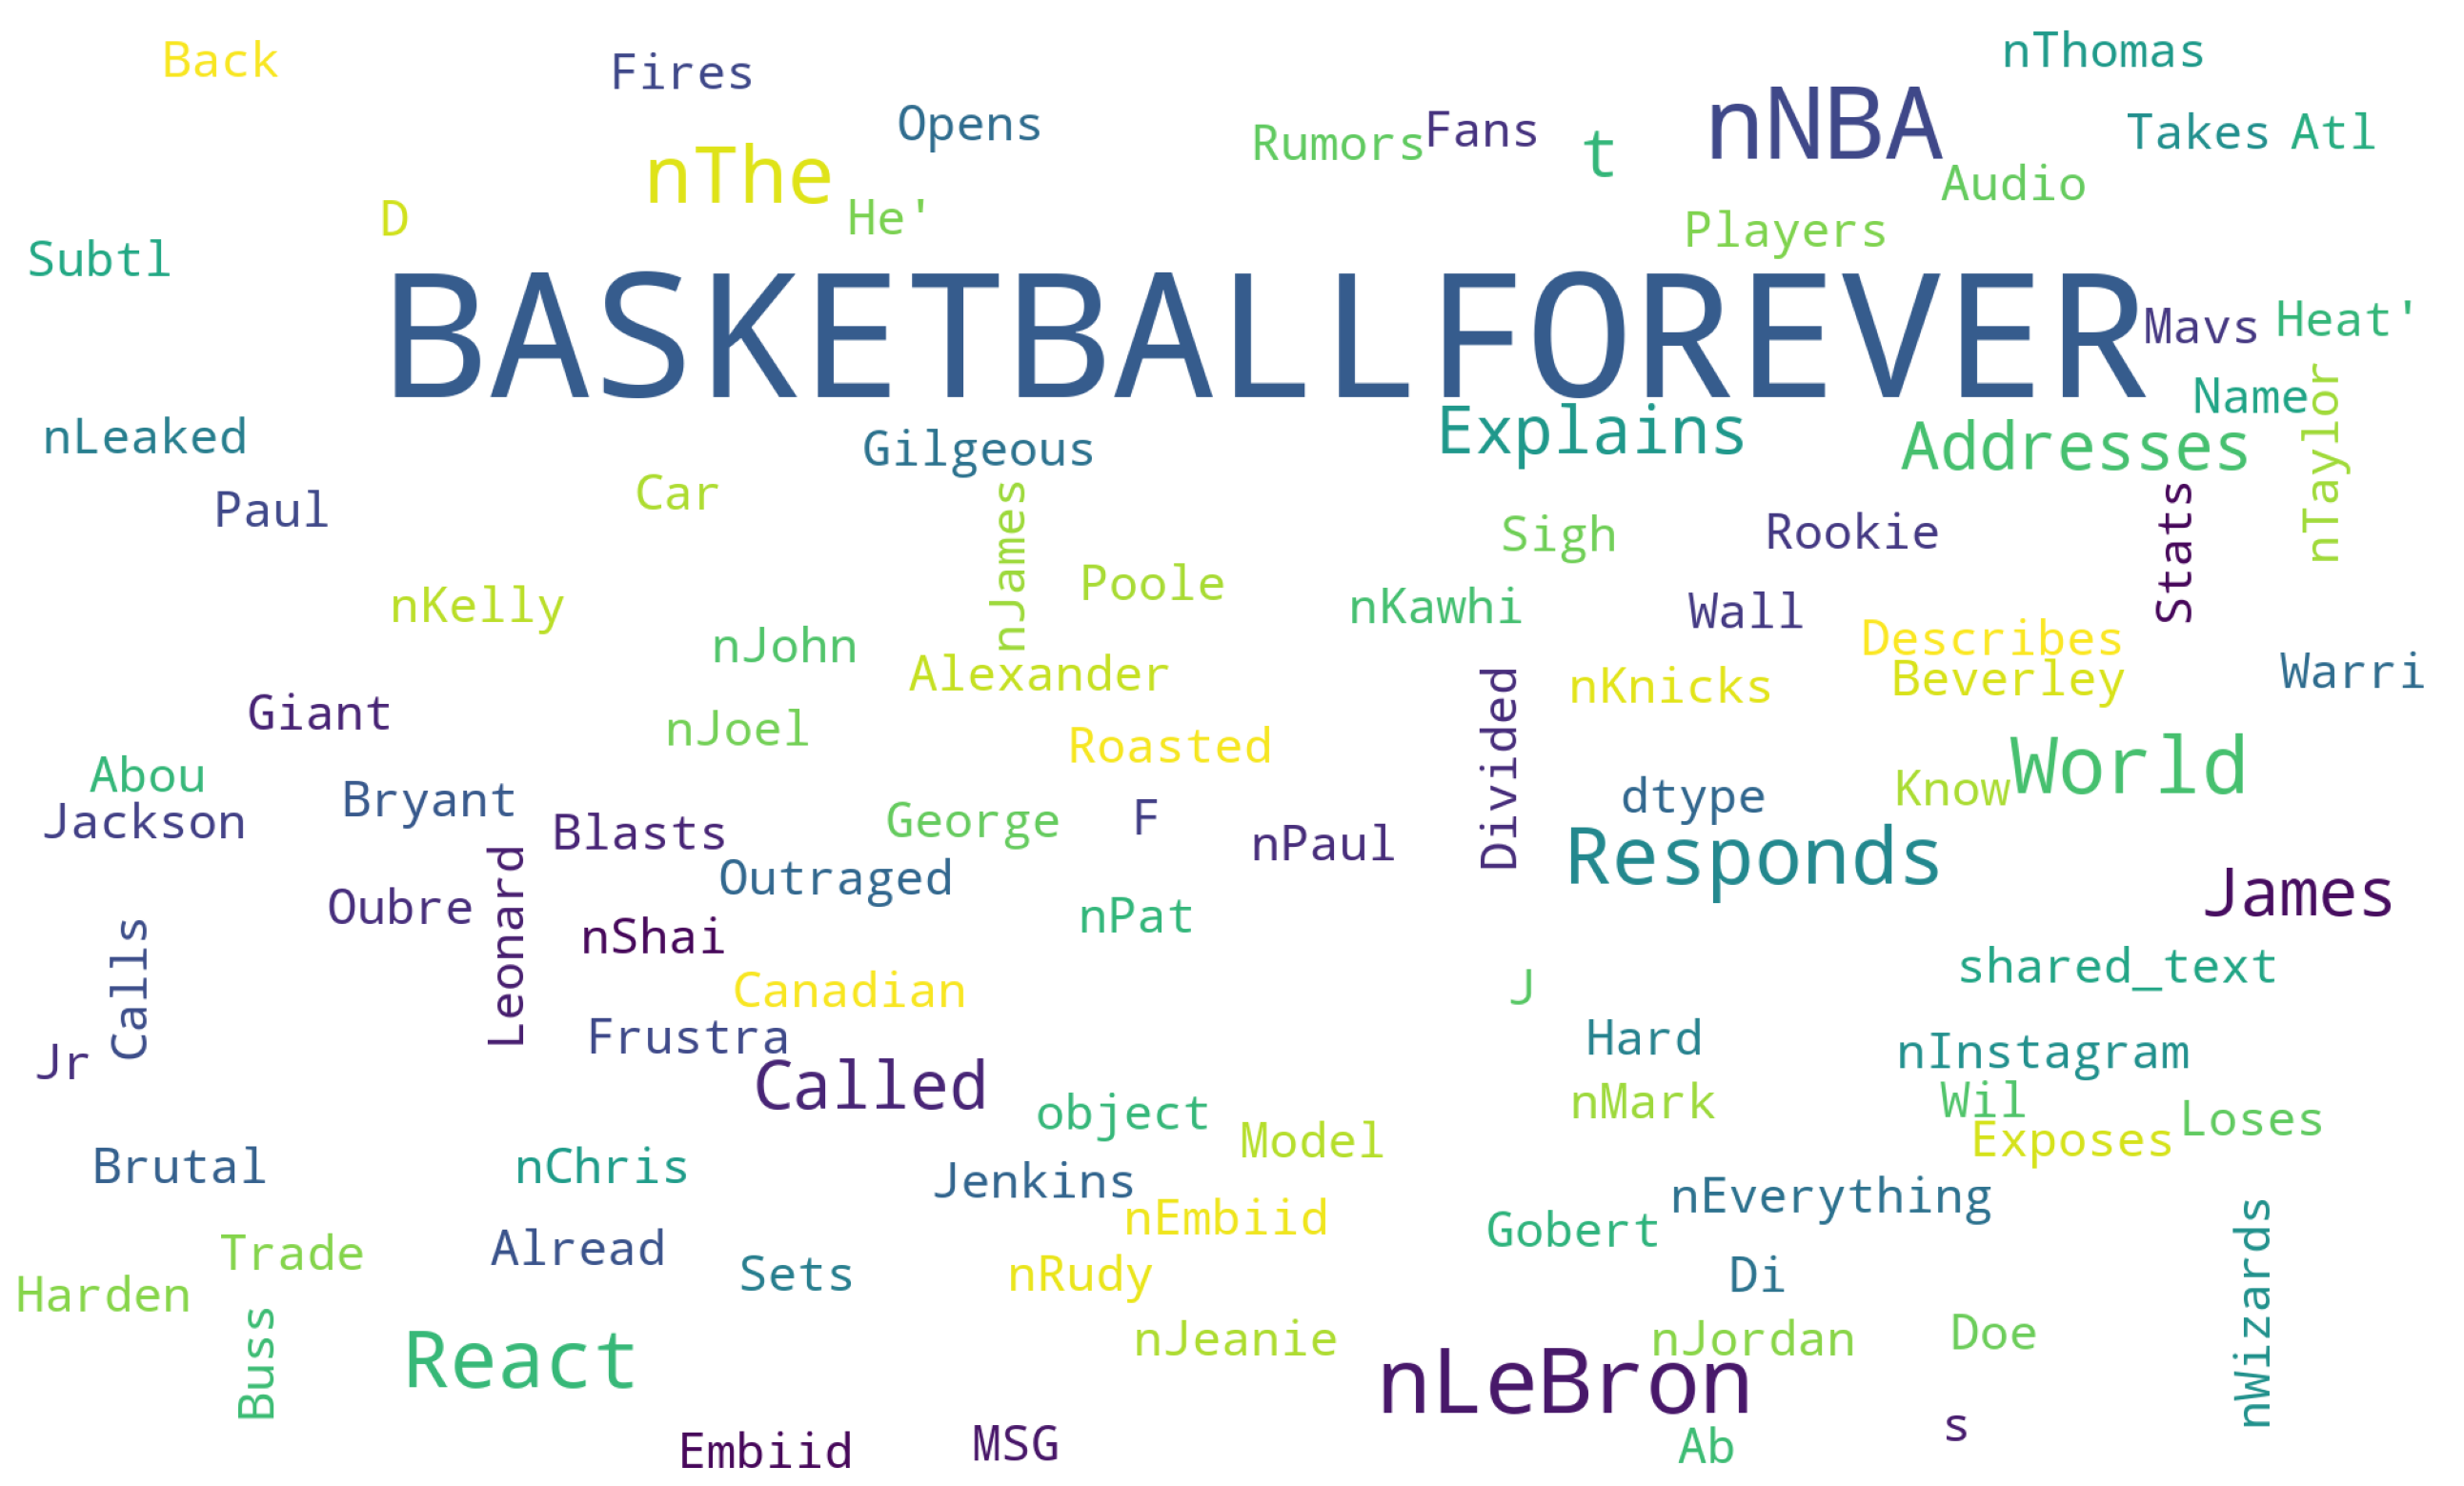

In [13]:
text = str(post_share['shared_text'])
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [14]:
#image include
image_post = df.loc[df['Has_image'] == True]


In [15]:
video_post = df.loc[df['Has_video'] == True]


In [16]:
both_image_video_post = df.loc[(df['Has_video'] == True) & (df['Has_image'] == True) ]

In [17]:
not_image_video_post = df.loc[(df['Has_video'] ==False) & (df['Has_image'] == False) ]


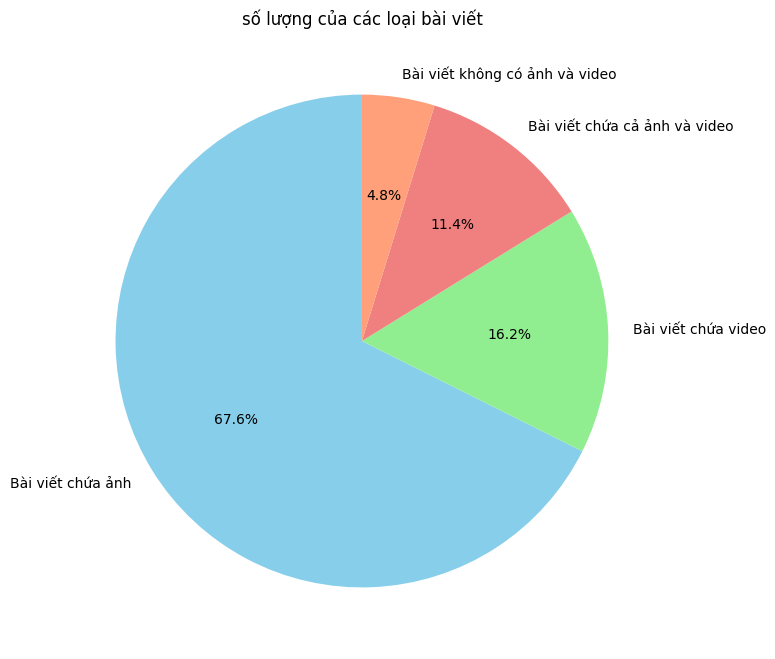

In [23]:
number_image_post = len(image_post)
number_video_post = len(video_post)
number_both_image_video_post = len(both_image_video_post)
number_not_image_video_post = len(not_image_video_post)
number_counts = [number_image_post, number_video_post, number_both_image_video_post, number_not_image_video_post]
labels = ['Bài viết chứa ảnh', 'Bài viết chứa video', 'Bài viết chứa cả ảnh và video', 'Bài viết không có ảnh và video']
plt.figure(figsize=(8, 8))
plt.pie(number_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('số lượng của các loại bài viết')
plt.show()

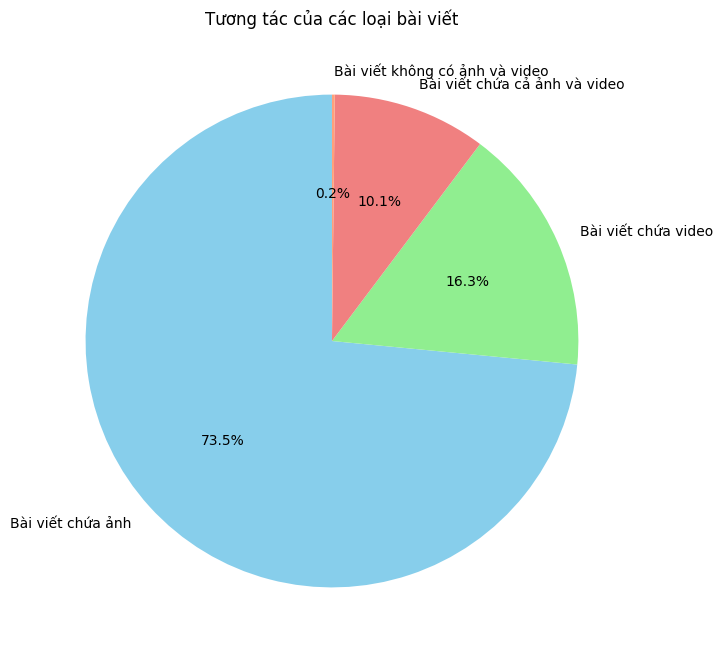

In [19]:
interaction_image_post = image_post['reaction_count'].sum()
interaction_video_post = video_post['reaction_count'].sum()
interaction_both_image_video_post = both_image_video_post['reaction_count'].sum()
interaction_not_image_video_post = not_image_video_post['reaction_count'].sum()
interaction_counts = [interaction_image_post, interaction_video_post, interaction_both_image_video_post, interaction_not_image_video_post]
labels = ['Bài viết chứa ảnh', 'Bài viết chứa video', 'Bài viết chứa cả ảnh và video', 'Bài viết không có ảnh và video']
plt.figure(figsize=(8, 8))
plt.pie(interaction_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Tương tác của các loại bài viết')
plt.show()

In [20]:
#nguoi xem thich bai viet co canh hon video
# bai viet co ca anh va video co tong tuong tac it
# => co anh huong toi so luong, dang anh nhieu => nhieu luot tuong tac
# => let's find out by see the plot of number of post.


In [24]:
#bai viet khong chua anh, video 

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

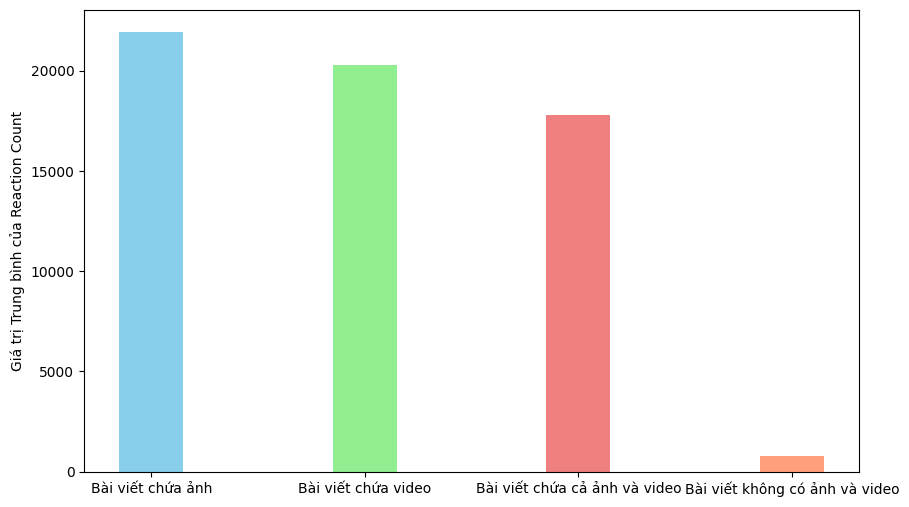

In [32]:
mean_list = [image_post['reaction_count'].mean(),  video_post['reaction_count'].mean(), both_image_video_post['reaction_count'].mean(), not_image_video_post['reaction_count'].mean()]
labels = ['Bài viết chứa ảnh', 'Bài viết chứa video', 'Bài viết chứa cả ảnh và video', 'Bài viết không có ảnh và video']
plt.figure(figsize=(10, 6))
plt.ylabel('Giá trị Trung bình của Reaction Count')
plt.bar(labels, mean_list, color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'], width=0.3 )
plt.show()

<AxesSubplot: >

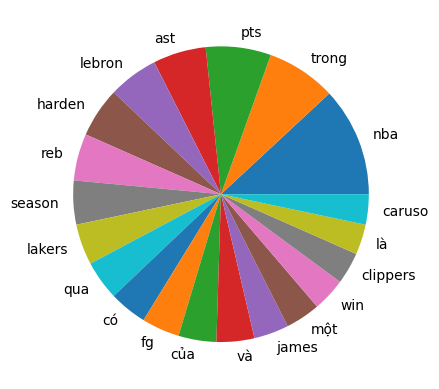

In [72]:
text_data = df['post_text'].astype(str)
vectorizer = CountVectorizer(stop_words='english', max_features=100)
X = vectorizer.fit_transform(text_data)
feature_names = vectorizer.get_feature_names_out()
keyword_counts = pd.DataFrame(data=X.toarray(), columns=feature_names)
total_counts = keyword_counts.sum()
most_common_keywords = total_counts.sort_values(ascending=False).head(20)
most_common_keywords.plot(kind = 'pie')

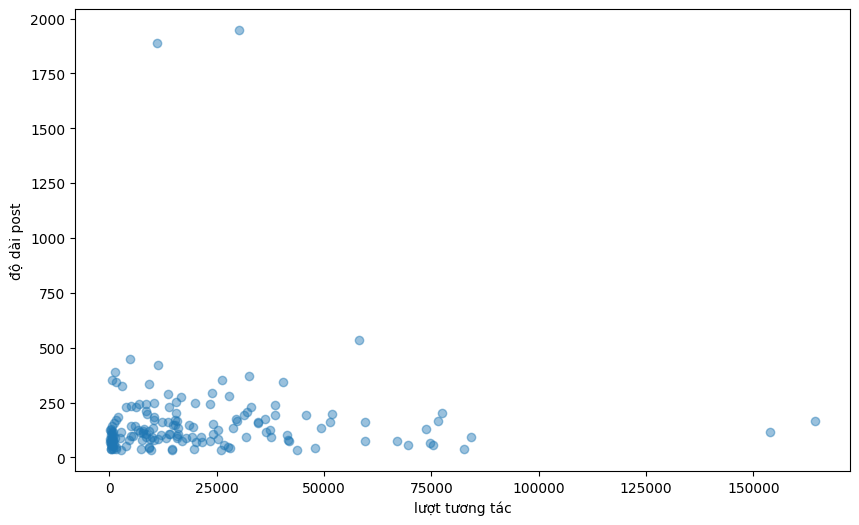

In [11]:
plt.figure(figsize = (10,6))
plt.scatter( df['reaction_count'], len_post,alpha = 0.45)
plt.xlabel('lượt tương tác')
plt.ylabel('độ dài post')
plt.show()

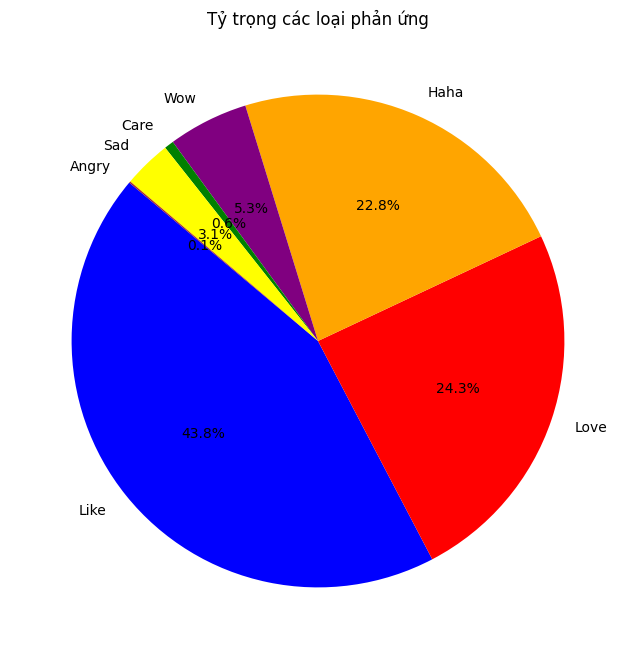

In [135]:

reaction_columns = ['Like', 'Love', 'Haha', 'Wow', 'Care', 'Sad', 'Angry']
reaction_totals = df[reaction_columns].sum()
plt.figure(figsize=(8, 8))
plt.pie(reaction_totals, labels=reaction_totals.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'red', 'orange', 'purple', 'green', 'yellow', 'brown'])
plt.title('Tỷ trọng các loại phản ứng')
plt.show()


In [143]:
max_share_post_ind = df['reaction_count'].idxmax()
df.loc[max_share_post_ind]

Unnamed: 0                                                       39
post_text         The Warriors CHOKE away a 12-point lead as the...
shared_text                                                       0
time                                            2023-11-15 12:32:49
comments                                                       4205
shares                                                        13131
comments_full     [{'comment_id': '308864348616150', 'comment_ur...
reaction_count                                               164274
Like                                                          24371
Love                                                           1296
Haha                                                         136622
Wow                                                             561
Care                                                            220
Sad                                                             956
Angry                                           

In [139]:
top_10_posts = df.nlargest(10, 'reaction_count')
top_10_posts

,Unnamed: 0,post_text,shared_text,time,comments,shares,comments_full,reaction_count,Like,Love,Haha,Wow,Care,Sad,Angry,Day_name,Time_post_hour,post_time,Has_image,Has_video
39,39,The Warriors CHOKE away a 12-point lead as the...,0,2023-11-15 12:32:49,4205,13131,"[{'comment_id': '308864348616150', 'comment_ur...",164274,24371,1296,136622,561,220,956,248,Wednesday,12,15-11-23,True,False
156,156,Victor Wembanyama DOMINATES with a CAREER-HIGH...,0,2023-11-03 11:29:08,4700,28000,[],153875,64288,65112,1007,22078,1293,67,30,Friday,11,03-11-23,True,False
142,142,"LaMelo Ball GOES OFF for 30 PTS, 10 REB, 13 AS...",0,2023-11-06 10:03:04,905,5100,[],84341,40503,37108,466,5183,897,170,14,Monday,10,06-11-23,True,False
155,155,Imagine making Kevin Durant look short 🤯,0,2023-11-03 12:06:11,1400,3900,[],82695,47384,24163,2305,8291,513,32,7,Friday,12,03-11-23,True,False
110,110,The Los Angeles Lakers are interested in pursu...,0,2023-11-08 18:00:12,3482,4582,"[{'comment_id': '303692175919114', 'comment_ur...",77604,37378,31133,3556,4742,723,32,40,Wednesday,18,08-11-23,True,False
43,43,HUGE SCUFFLE IN WARRIORS-WOLVES! 🚨\n\nDraymond...,0,2023-11-15 10:22:28,7732,29246,"[{'comment_id': '720980363235230', 'comment_ur...",76558,17584,804,56268,1452,154,190,106,Wednesday,10,15-11-23,False,True
151,151,Imagine if Victor Wembanyama bulks up like Gia...,0,2023-11-03 18:30:07,3000,4800,[],75423,37691,29337,862,6883,604,39,7,Friday,18,03-11-23,True,False
147,147,BREAKING: C.J. McCollum has been diagnosed wit...,0,2023-11-06 05:11:20,2200,5900,[],74637,11032,380,84,7940,1990,53201,10,Monday,5,06-11-23,True,False
67,67,"Tyrese Maxey ERUPTS for a CAREER-HIGH 50 PTS, ...",0,2023-11-13 08:18:38,1966,8066,"[{'comment_id': '2049850662046405', 'comment_u...",73760,36927,26969,70,9335,437,13,9,Monday,8,13-11-23,True,False
101,101,LeBron and Brooks stand-off 😂\n\nLeBron và Bro...,0,2023-11-09 09:02:28,3199,3869,"[{'comment_id': '1991003864608398', 'comment_u...",69603,16278,670,52421,102,91,24,17,Thursday,9,09-11-23,True,True


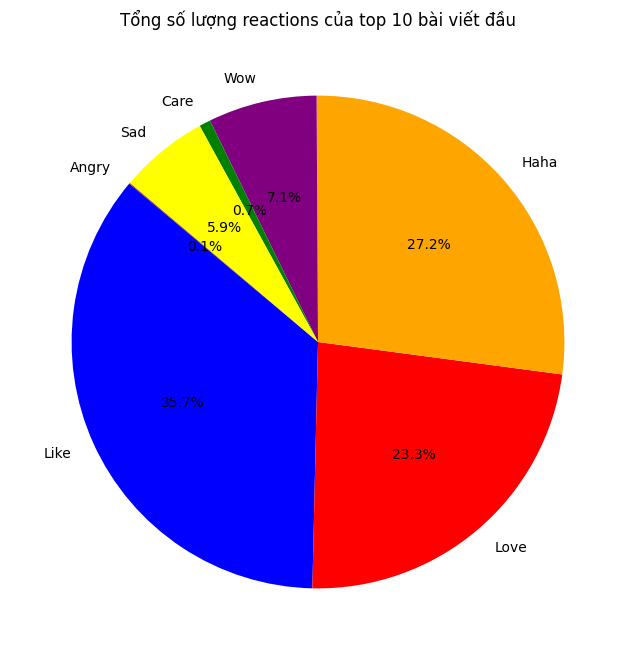

In [144]:
# các bài viết có nhiều lượt reactions thì thường các cảm xúc khác like ở mức cao?
# cùng xem tỉ trọng
reaction_totals_top10 = top_10_posts[['Like', 'Love', 'Haha', 'Wow', 'Care', 'Sad', 'Angry']].sum()
plt.figure(figsize=(8, 8))
plt.pie(reaction_totals_top10, labels=reaction_totals_top10.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'red', 'orange', 'purple', 'green', 'yellow', 'brown'])
plt.title('Tổng số lượng reactions của top 10 bài viết đầu')
plt.show()

In [141]:
# so sánh tỉ trọng 10 bài nhiều tương tác nhất và 10 bài ít nhất

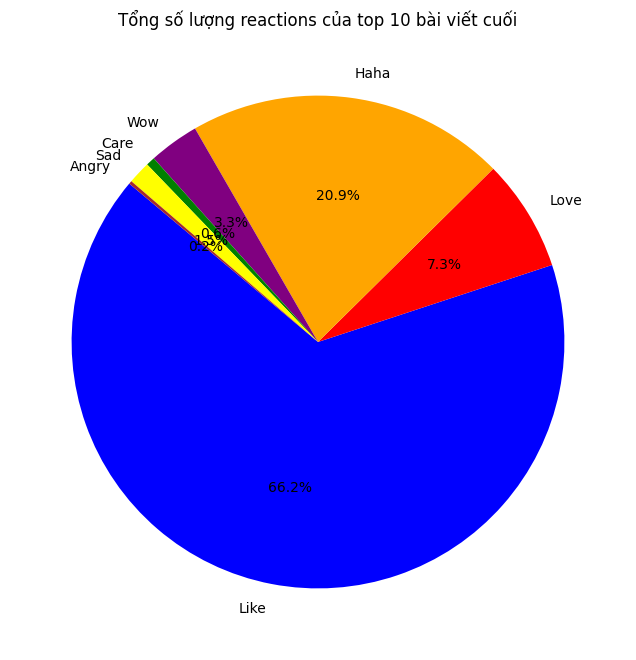

In [145]:
bottom_10_posts = df.nsmallest(10, 'reaction_count')
reaction_totals_bottom10 = bottom_10_posts[['Like', 'Love', 'Haha', 'Wow', 'Care', 'Sad', 'Angry']].sum()
plt.figure(figsize=(8, 8))
plt.pie(reaction_totals_bottom10, labels=reaction_totals_bottom10.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'red', 'orange', 'purple', 'green', 'yellow', 'brown'])
plt.title('Tổng số lượng reactions của top 10 bài viết cuối')
plt.show()

In [146]:
# => các bài nhiều tương tác nhất thì tỉ trọng like không chiếm đa số như các bài viết ít tương tác 

<AxesSubplot: xlabel='Time_post_hour'>

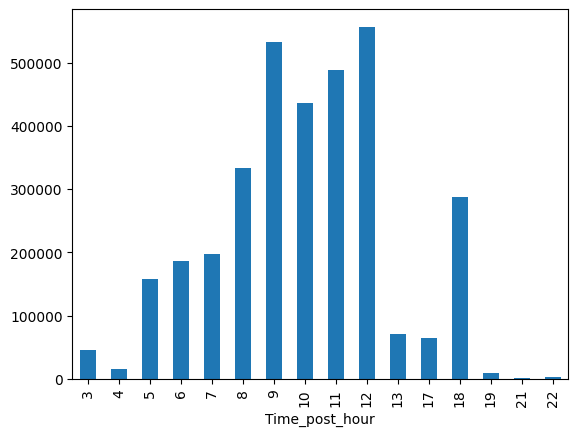

In [91]:
#reactions theo gio
reaction_day = df.groupby('Time_post_hour')['reaction_count'].sum()
reaction_day.plot(kind= 'bar')

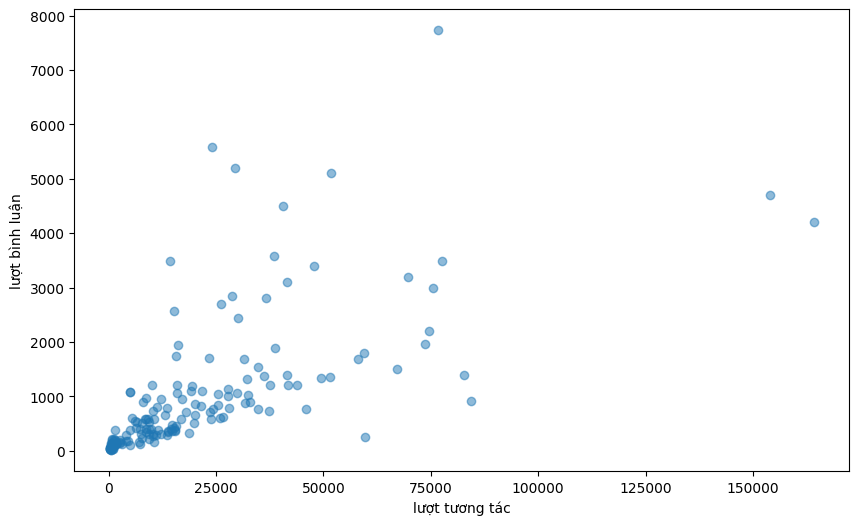

In [173]:
#total reaction va comments.
plt.figure(figsize = (10,6))
plt.scatter( df['reaction_count'], df['comments'],alpha = 0.5)
plt.xlabel('lượt tương tác')
plt.ylabel('lượt bình luận')
plt.show()


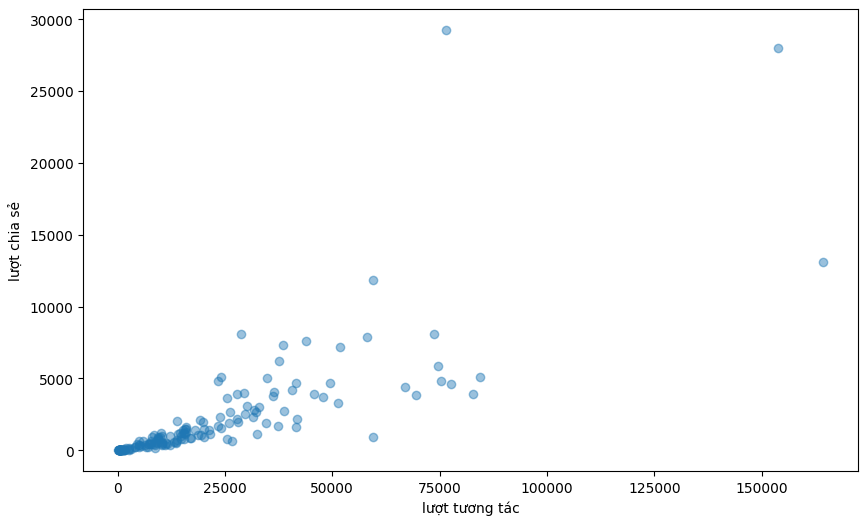

In [185]:
plt.figure(figsize = (10,6))
plt.scatter( df['reaction_count'], df['shares'],alpha = 0.45)
plt.xlabel('lượt tương tác')
plt.ylabel('lượt chia sẻ')
plt.show()

In [12]:
#những post viết rất dài lượt tương tác ở mức trung bình
# những bài nhiều tương tác => độ đai dưới 250 từ
#hầu hết các bài viết dưới 500 từ
# page đưa tin => viết ngắn gọn => dễ truyền đạt => ngắn gọn xúc tích

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [51]:
Data = df[['shared_text', 'reaction_count']]
Data['Post_Category'] = Data['shared_text'].apply(lambda x: 'Original' if x == '0' else 'Shared')

C:\Users\dienmayxanh.com\AppData\Local\Temp\ipykernel_7360\2182414186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Post_Category'] = Data['shared_text'].apply(lambda x: 'Original' if x == '0' else 'Shared')


In [53]:
X_train, X_test, y_train, y_test = train_test_split(Data[['reaction_count']], Data['Post_Category'], test_size=0.2, random_state=42)

In [62]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)


Accuracy: 0.9696969696969697
Classification Report:
               precision    recall  f1-score   support

    Original       0.96      1.00      0.98        23
      Shared       1.00      0.90      0.95        10

    accuracy                           0.97        33
   macro avg       0.98      0.95      0.96        33
weighted avg       0.97      0.97      0.97        33



IndexError: index 1 is out of bounds for axis 0 with size 1

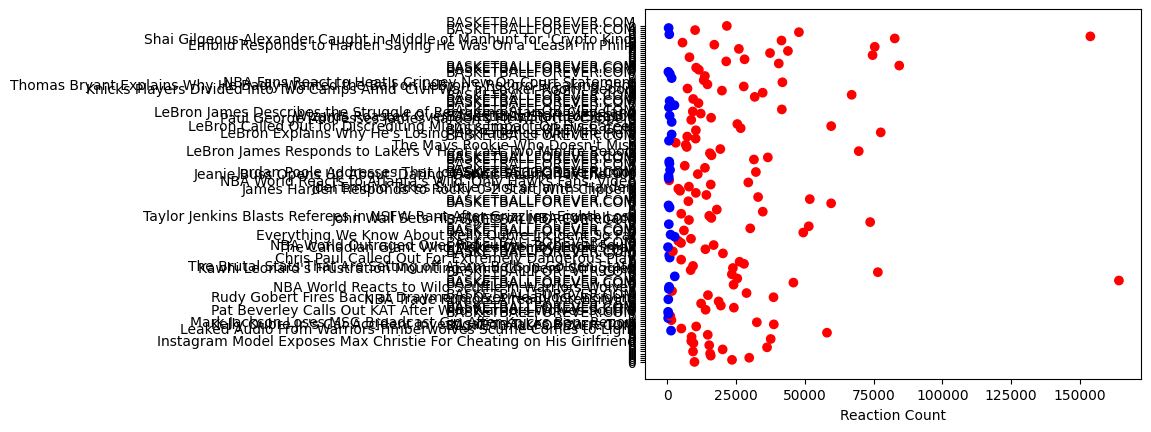

In [66]:
colors = Data['Post_Category'].apply(lambda x: 'red' if x == 'Original' else 'blue')

plt.scatter(Data['reaction_count'], range(len(Data)), c=colors, label=Data['Post_Category'])
plt.xlabel('Reaction Count')
plt.yticks(range(len(Data)), Data['shared_text'])

x_values = np.linspace(min(X_test['reaction_count']), max(X_test['reaction_count']), 100)
y_values = -(model.coef_[0][0] * x_values + model.intercept_[0]) / model.coef_[0][1]
plt.plot(x_values, y_values, label='Decision Boundary', color='green')
plt.legend()
plt.show()